In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models
from PIL import Image, ImageChops, ImageEnhance, ImageOps
from os import listdir, mkdir
from os.path import isfile, join
from sklearn.metrics import roc_curve, auc
%matplotlib notebook
from keras.models import load_model
import matplotlib.image as mpimg
import imageio as im
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from time import time

In [55]:
# dimensión de las imágenes
img_width, img_height = 100,100

#ruta de las imágenes
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/test'

nb_train_samples = 2000
nb_validation_samples = 800

#Se puede disminuir las épocas para una prueba más rápida
#Podría demorar 1 minuto por época aproximadamente
epochs = 50
batch_size = 256

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [56]:
# ESTO ES PARA SALVAR LAS IMÁGENES CON LAS NUEVAS DIMENSIONES
#ruta = "dataset/train"
#newdir = "resizeImages"
#mkdir(newdir)

#def ls(ruta):
#    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]

#def resized(origen, destino,ancho,largo):
    
#    for name in ls(origen):

        #print (name)
        #imagen = Image.open(origen+"/"+name)
        #new_image = imagen.resize((ancho, largo))
        #new_image.save(destino+"/"+"resized_"+name)

In [57]:
#resized(ruta, newdir, img_width, img_height)

In [58]:
#ESTRUCTURA INICIAL, parámetros temporales

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 64)       

In [59]:
#Compilación

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

#Creación del DataSET a partir de las imágenes en la carpeta dataset

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#REESCALADO

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Conjunto de datos y etiquetas para ENTRENAMIENTO
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Conjunto de datos y etiquetas para VALIDACIÓN
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [60]:
#Entrenamiento
start_time = time()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# Salvado de pesos como archivo
model.save_weights('estructura_1.h5')

elapsed_time = time() - start_time

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: -25.4585 - acc: 0.1490 - val_loss: -121.8761 - val_acc: 0.1615
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: -482.3022 - acc: 0.1401 - val_loss: -1339.7335 - val_acc: 0.1615
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: -3259.7475 - acc: 0.1574 - val_loss: -8054.3794 - val_acc: 0.1615
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: -17160.0559 - acc: 0.1395 - val_loss: -34228.6204 - val_acc: 0.1615
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: -63503.5128 - acc: 0.1401 - val_loss: -116097.6354 - val_acc: 0.1615
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: -195735.4643 - acc: 0.1434 - val_loss: -332879.5833 - val_acc: 0.1615
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: -530706.1161 - acc: 0.1323 - val_loss: -837225.7917 - val_acc: 0.1615
Epoch 8/50
7/7 [==============================

In [61]:
print(elapsed_time)

406.33707761764526


<IPython.core.display.Javascript object>


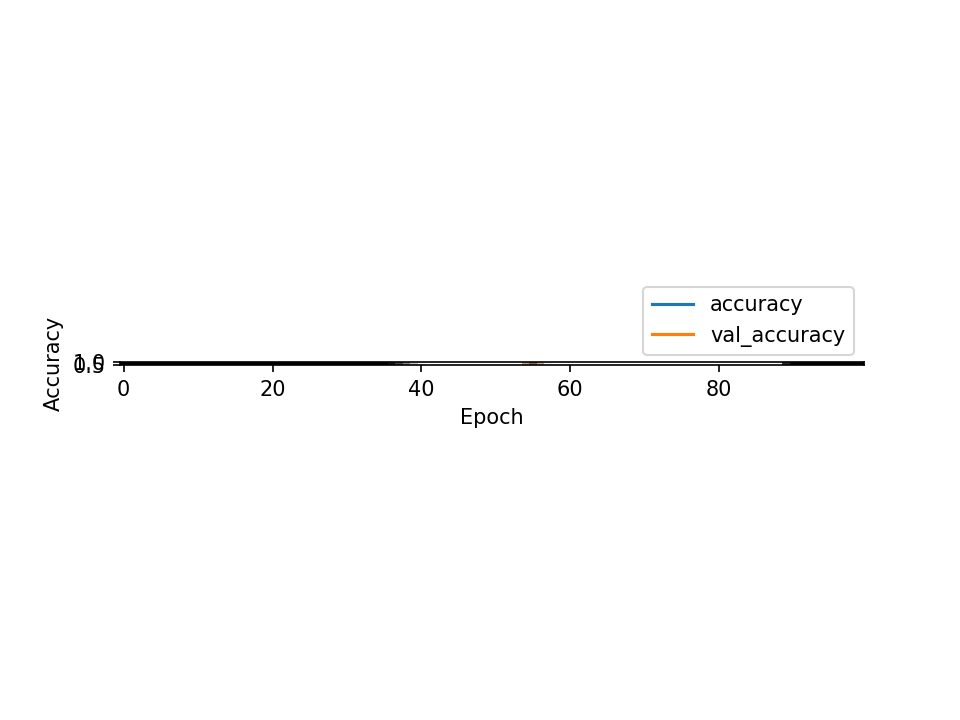

43/43 - 45s - loss: -1.6257e+11 - acc: 0.1450


In [62]:
#Curva aciertos en épocas 
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

evaluation = model.evaluate_generator(train_generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=2)


In [69]:
# Plot ENTRENAMIENTO & VALIDACI accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot ENTRENAMIENTO & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [70]:
img_path = 'dataset/test/freshapples/resized_rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png'

img = image.load_img(img_path, target_size=(100, 100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'load_img'

In [64]:
image = np.expand_dims(image, axis=0) #para agregar una dimensión extra

In [65]:
layer_outputs = [layer.output for layer in model.layers[:5]] # Extrae los resultados de las 5 capas superiores.
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Crea un modelo que devolverá las salidas, dada la entrada del modelo

In [66]:
activations = activation_model.predict(img_tensor) # Devuelve una lista de cinco matrices

<IPython.core.display.Javascript object>


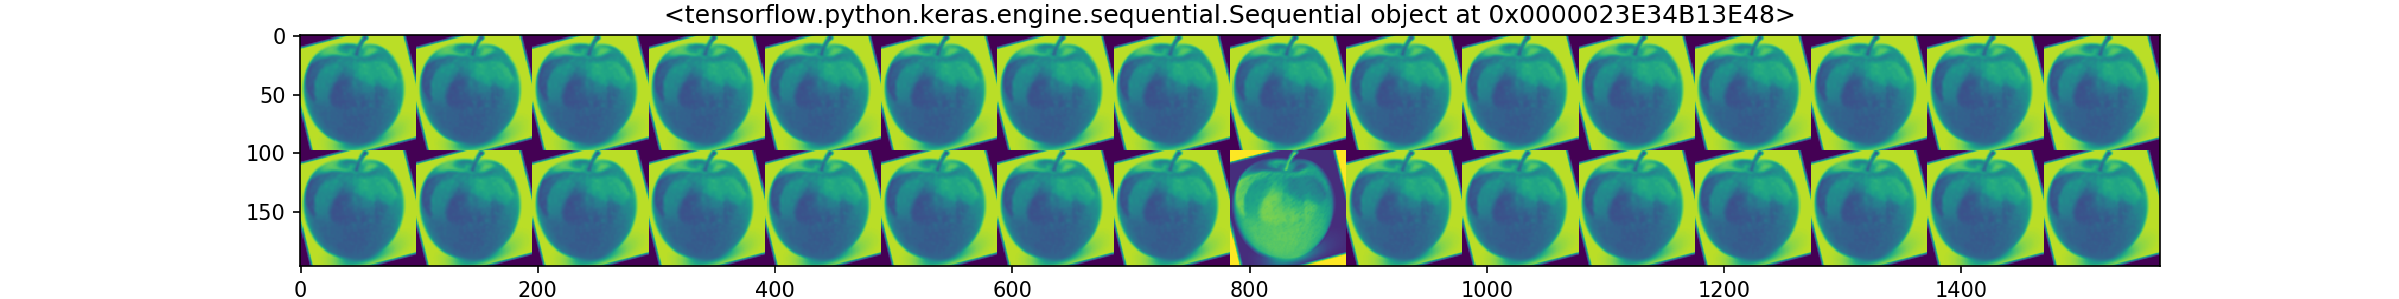

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


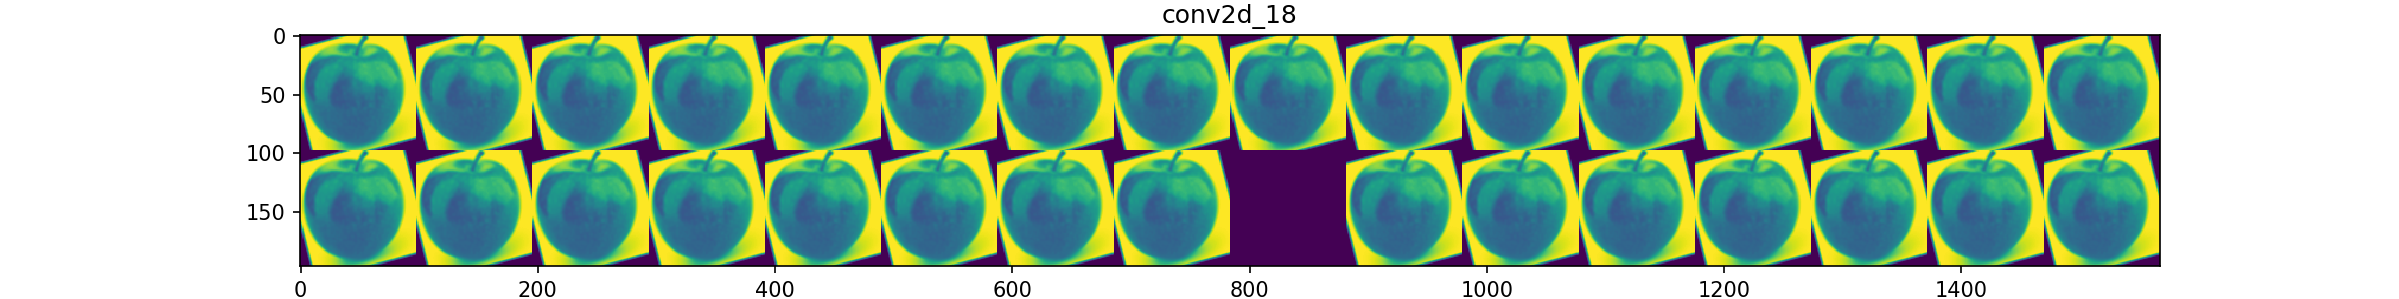

<IPython.core.display.Javascript object>


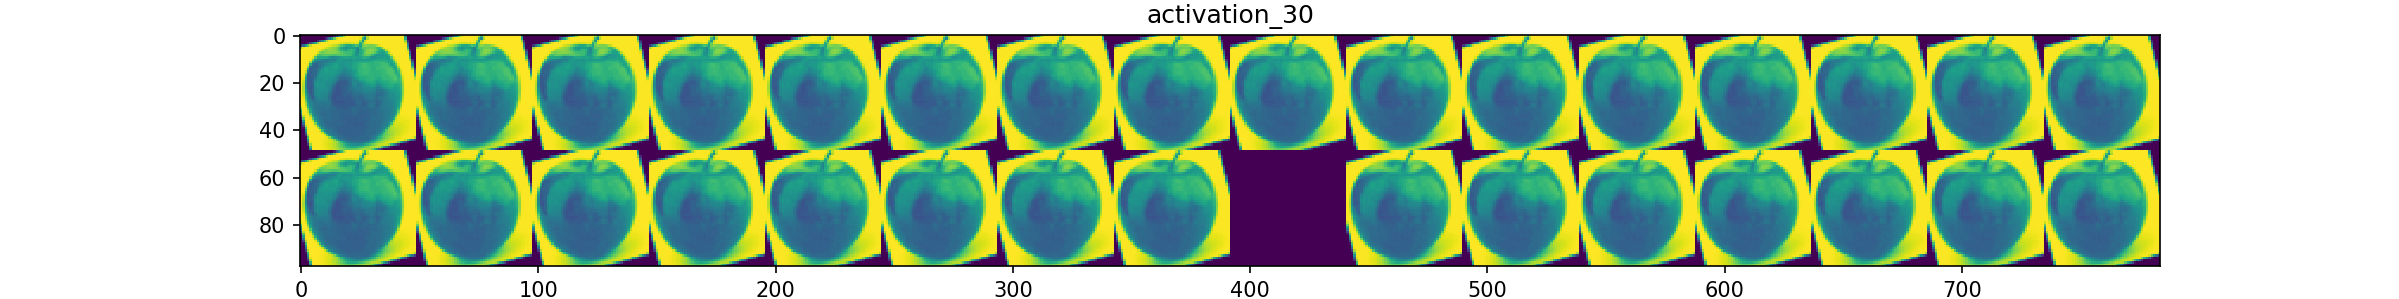

<IPython.core.display.Javascript object>


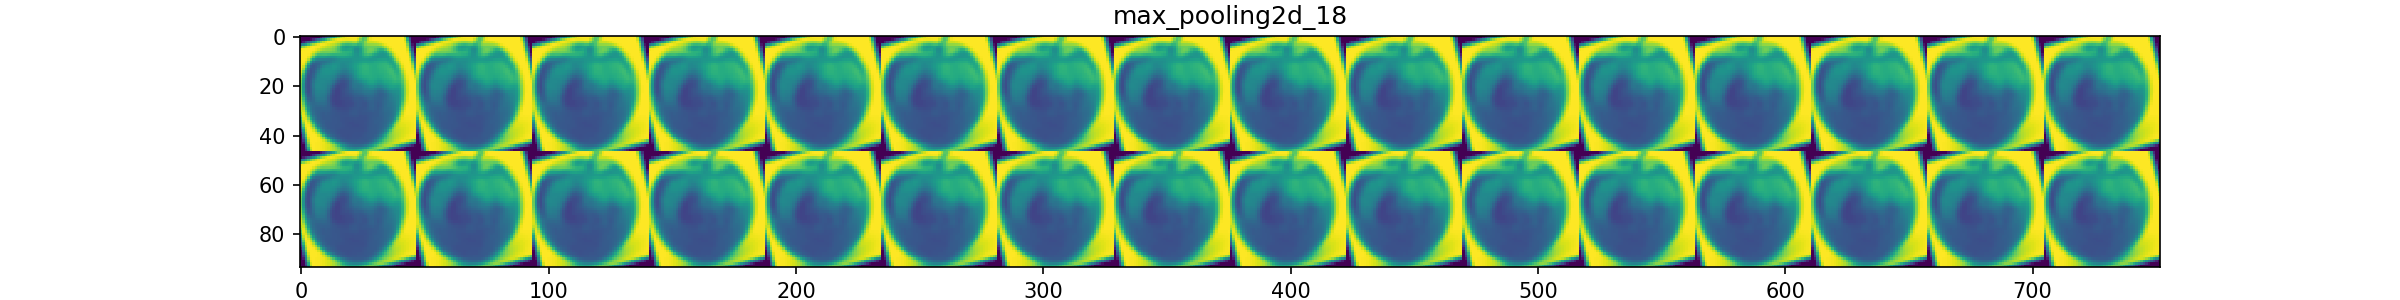

<IPython.core.display.Javascript object>


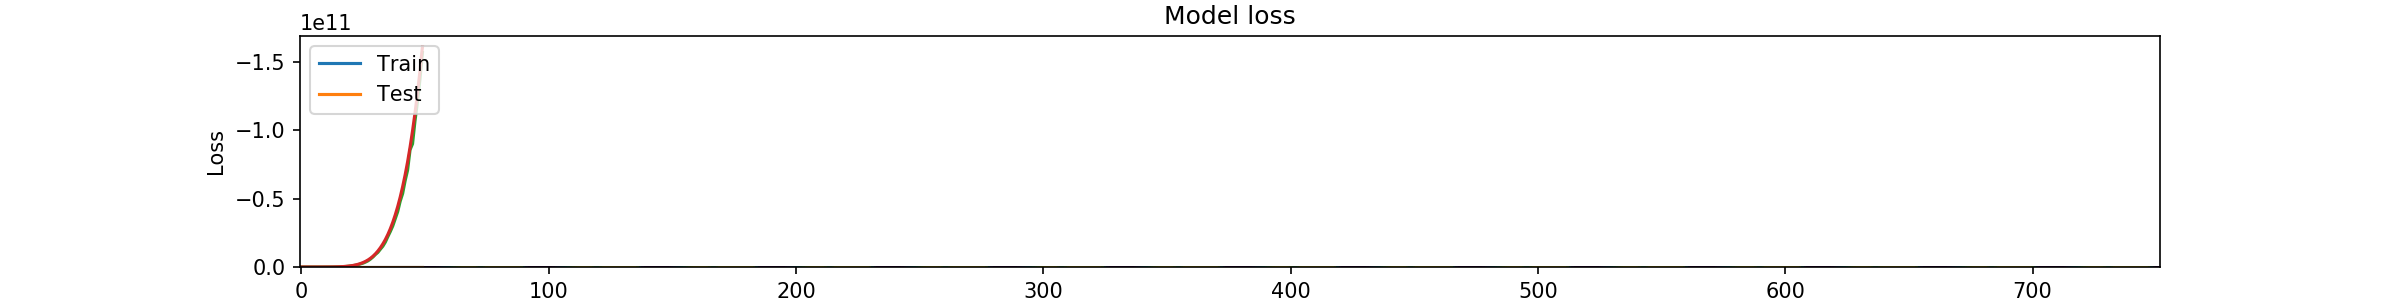

In [67]:
layer_names = [model]
for layer in model.layers[:12]:
    layer_names.append(layer.name) # nombre de las capas
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Muestra los mapas de características
    n_features = layer_activation.shape[-1] # Número de características en el mapa de características
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row # Mosaicos de los canales de activación en esta matriz
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): #Coloca cada filtro en una cuadrícula horizontal
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-procesa la función para que sea visualmente agradable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [34]:
def roc_curve(history, outputs):
    '''Returns a ROC curve. Outputs should be in range 0-1
    in order to move the threshold.'''
    tpr = []
    fpr = []
    for threshold in np.linspace(0, 1, 1000):
        outputs_with_threshold = (outputs > threshold).astype(np.float)
        ((TP, FP), (FN, TN)) = confusion_matrix(
            targets, 
            outputs_with_threshold)
        tpr.append(TP/(TP+FN))
        fpr.append(FP/(FP+TN))
    return np.array(tpr), np.array(fpr)

In [68]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold = roc_curve(test_datagen, clf.predict_proba(X_test)[:,1])

NameError: name 'clf' is not defined